In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import os

%matplotlib inline

import warnings
warnings.filterwarnings(action='ignore')

pd.set_option('display.max_seq_items', None)

# 한글 세팅
from matplotlib import font_manager, rc
font_path = "C:\Windows\Fonts/H2GTRM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [2]:
# 현재경로 확인
dir_path = os.getcwd()

# data 파일 경로 설정
file_name = 'data_0927.xlsx'
data_path = os.path.join(dir_path, file_name)
print(data_path)

C:\Users\이지영\Desktop\Workspace\Python\CyberCrime\data_0927.xlsx


In [3]:
df = pd.read_excel(data_path,engine="openpyxl", header=2)

In [4]:
df.head()

,번호,구분,사건명,"발생년도\n(연,월,일)",범죄 대상(단체),피해 국가,범죄주체,범죄주체\n관련국가,내부/외부 범죄 여부,동기(목적),...,Result,국내적용 법률,국제적용법률,자료형태,자료제목,출처 및 링크,비고,Unnamed: 25,Unnamed: 26,Unnamed: 27
0,1,데이터,코인체크 공격,2018.01.26,암호화폐 거래사업자 코인체크,일본,라자루스,북한,외부,금전적 이득,...,금전 손실,피해국가 국내법,국가책임법,웹사이트,코인체크 해킹 사건,"NAVER 지식백과, 2018년3월6일 입력, 2021년8월30일 접속, https...",NaN,NaN,NaN,NaN
1,2,데이터,3·20 전산 대란,2013.03.20,"MBC, KBS, YTN, 신한은행, 농협, 제주은행",한국,북한 정찰총국,북한,외부,"사회혼란, 정보획득",...,사회혼란,정보통신망법,"UN헌장, 국가책임법",학술지,국가 사이버보안 피해금액 분석과 대안 - 3.20 사이버 침해사건을 중심으로-,"신영웅, 전상훈, 임채호, 김명철, 『국가정보연구』, 제6권 1호(2013), p.134",NaN,NaN,NaN,NaN
2,3,데이터,6·25 사이버 테러,2013.06.25,"새누리당, 청와대, 정부당국, 언론사, 군장병, 주한미군",한국,북한 정찰총국,북한,외부,"사회혼란, 정보획득",...,사회혼란,정보통신망법,"UN헌장, 국가책임법",웹사이트,"10만건 개인정보유출 사실로 드러나…청와대, 사과문 공지","디지털데일리, 2013년6월29일 입력, 2021년8월30일접속, http://ww...",NaN,NaN,NaN,NaN
3,4,데이터,소니 픽쳐스 해킹,2014.11.24,소니 픽쳐스 엔터테인먼트,미국,북한 정찰총국,북한,외부,"정보획득, 경제손실",...,금전 손실,피해국가 국내법,국가책임법,기사,북한의 사이버전 능력을 보여주는 5대 해킹 사건,"BBC News, 2017년10월12 입력, 2021년 8월26일 접속, https...",NaN,NaN,NaN,NaN
4,5,데이터,1·25 인터넷 대란,2003.01.25,KT,한국,NaN,NaN,외부,사회혼란,...,사회혼란,NaN,NaN,웹사이트,대한민국의 정보 보안 사고 목록,"위키백과, https://ko.wikipedia.org/wiki/%EB%8C%80%...",https://namu.wiki/w/1.25%20%EC%9D%B8%ED%84%B0%...,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 28 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   번호            306 non-null    int64  
 1   구분            306 non-null    object 
 2   사건명           306 non-null    object 
 3   발생년도
(연,월,일)  296 non-null    object 
 4   범죄 대상(단체)     291 non-null    object 
 5   피해 국가         287 non-null    object 
 6   범죄주체          199 non-null    object 
 7   범죄주체
관련국가     188 non-null    object 
 8   내부/외부 범죄 여부   260 non-null    object 
 9   동기(목적)        214 non-null    object 
 10  Purpose       300 non-null    object 
 11  공격 유형(대분류)    223 non-null    object 
 12  사용된 기술(중분류)   205 non-null    object 
 13  Attack_Skill  300 non-null    object 
 14  준비기간
(공격기간)   48 non-null     object 
 15  해커수준
(등급)     2 non-null      object 
 16  자산피해규모        59 non-null     object 
 17  결과종합          299 non-null    object 
 18  Result        298 non-null    

In [6]:
purpose_count = df['동기(목적)'].value_counts()
purpose_count
# purpose_count.plot(kind='bar')

금전적 이득                               104
군, 국가핵심시설에 관한 정보탈취                    25
경쟁에서 우위선점                             11
정치적 목적달성                               9
복수심                                    8
정보획득                                   7
우월감                                    4
자기만족                                   4
정치적 목적 달성                              4
사회혼란                                   3
실수                                     3
영웅심                                    3
사회혼란, 정보획득                             3
정치적 목적달성(추정)                           3
망상장애                                   3
실력과시                                   2
분노표출                                   2
국가기능 마비, 사회혼란                          2
정치적 목적 달성, 사회혼란                        1
정보 획득                                  1
과실                                     1
정차적 목적달성                               1
복수심, 금전적 이득                            1
군, 국가핵심시설에 관한 정보탈취, 정치적 목적달성           1
정치적 목적 달성, 우월감  

In [7]:
df['결과종합'].value_counts()

시스템 마비              23
정신적 피해              22
정보유출, 사회혼란, 신뢰하락    13
금전 손실               11
사회혼란                 9
                    ..
사회혼란, 시스템 마비         1
정보 유출, 영업중단          1
직원 개인정보 유출           1
75만건의 공공아이핀 부정발급     1
여배우 사진 100여장 유출      1
Name: 결과종합, Length: 178, dtype: int64

In [8]:
df['범죄주체'].value_counts()

개인               37
조직               23
북한 정찰총국          20
북한                5
30대 여성            3
                 ..
Anonymous(추정)     1
이란(추정)            1
유튜버               1
호텔직원              1
회사 블래이징패스(추정)     1
Name: 범죄주체, Length: 100, dtype: int64

## 데이터프레임 생성

In [9]:
# 컬럼명 확인
df.columns

Index(['번호', '구분', '사건명 ', '발생년도\n(연,월,일)', '범죄 대상(단체)', '피해 국가', '범죄주체',
       '범죄주체\n관련국가', '내부/외부 범죄 여부', '동기(목적)', 'Purpose', '공격 유형(대분류)',
       '사용된 기술(중분류)', 'Attack_Skill', '준비기간\n(공격기간)', '해커수준\n(등급)', '자산피해규모',
       '결과종합', 'Result', '국내적용 법률', '국제적용법률', '자료형태', '자료제목', '출처 및 링크', '비고',
       'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27'],
      dtype='object')

In [10]:
# Unnamed 컬럼 삭제
Unnamed_col = ['Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27']
df.drop(columns=Unnamed_col, inplace=True)
df.columns

Index(['번호', '구분', '사건명 ', '발생년도\n(연,월,일)', '범죄 대상(단체)', '피해 국가', '범죄주체',
       '범죄주체\n관련국가', '내부/외부 범죄 여부', '동기(목적)', 'Purpose', '공격 유형(대분류)',
       '사용된 기술(중분류)', 'Attack_Skill', '준비기간\n(공격기간)', '해커수준\n(등급)', '자산피해규모',
       '결과종합', 'Result', '국내적용 법률', '국제적용법률', '자료형태', '자료제목', '출처 및 링크', '비고'],
      dtype='object')

In [11]:
## 데이터프레임화
# 사용할 컬럼만 추출
df_usecols = ['사건명 ', '발생년도\n(연,월,일)', '범죄 대상(단체)', '피해 국가', '범죄주체','범죄주체\n관련국가', '내부/외부 범죄 여부', 'Purpose','Attack_Skill','Result']
df_newcols = ['Case_Name','Date', 'Affected_Group','Affected_Country', 'Criminal', 'Criminal_Country','InOrOutside_Crime','Purpose','Attack_Skill','Result' ]

print(len(df_usecols))
print(len(df_newcols))

10
10


In [12]:
# df_new 생성
df_new = df[df_usecols]
df_new.columns = df_newcols
df_new.head()

,Case_Name,Date,Affected_Group,Affected_Country,Criminal,Criminal_Country,InOrOutside_Crime,Purpose,Attack_Skill,Result
0,코인체크 공격,2018.01.26,암호화폐 거래사업자 코인체크,일본,라자루스,북한,외부,금전적 이득,해킹,금전 손실
1,3·20 전산 대란,2013.03.20,"MBC, KBS, YTN, 신한은행, 농협, 제주은행",한국,북한 정찰총국,북한,외부,사회혼란,APT,사회혼란
2,6·25 사이버 테러,2013.06.25,"새누리당, 청와대, 정부당국, 언론사, 군장병, 주한미군",한국,북한 정찰총국,북한,외부,사회혼란,ScanNDoS,사회혼란
3,소니 픽쳐스 해킹,2014.11.24,소니 픽쳐스 엔터테인먼트,미국,북한 정찰총국,북한,외부,정보획득,악성코드,금전 손실
4,1·25 인터넷 대란,2003.01.25,KT,한국,NaN,NaN,외부,사회혼란,ScanNDoS,사회혼란


# 데이터 탐색(EDA)

In [13]:
## 데이터 개수, 데이터 타입, 결측치 확인
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Case_Name          306 non-null    object
 1   Date               296 non-null    object
 2   Affected_Group     291 non-null    object
 3   Affected_Country   287 non-null    object
 4   Criminal           199 non-null    object
 5   Criminal_Country   188 non-null    object
 6   InOrOutside_Crime  260 non-null    object
 7   Purpose            300 non-null    object
 8   Attack_Skill       300 non-null    object
 9   Result             298 non-null    object
dtypes: object(10)
memory usage: 24.0+ KB


<AxesSubplot:>

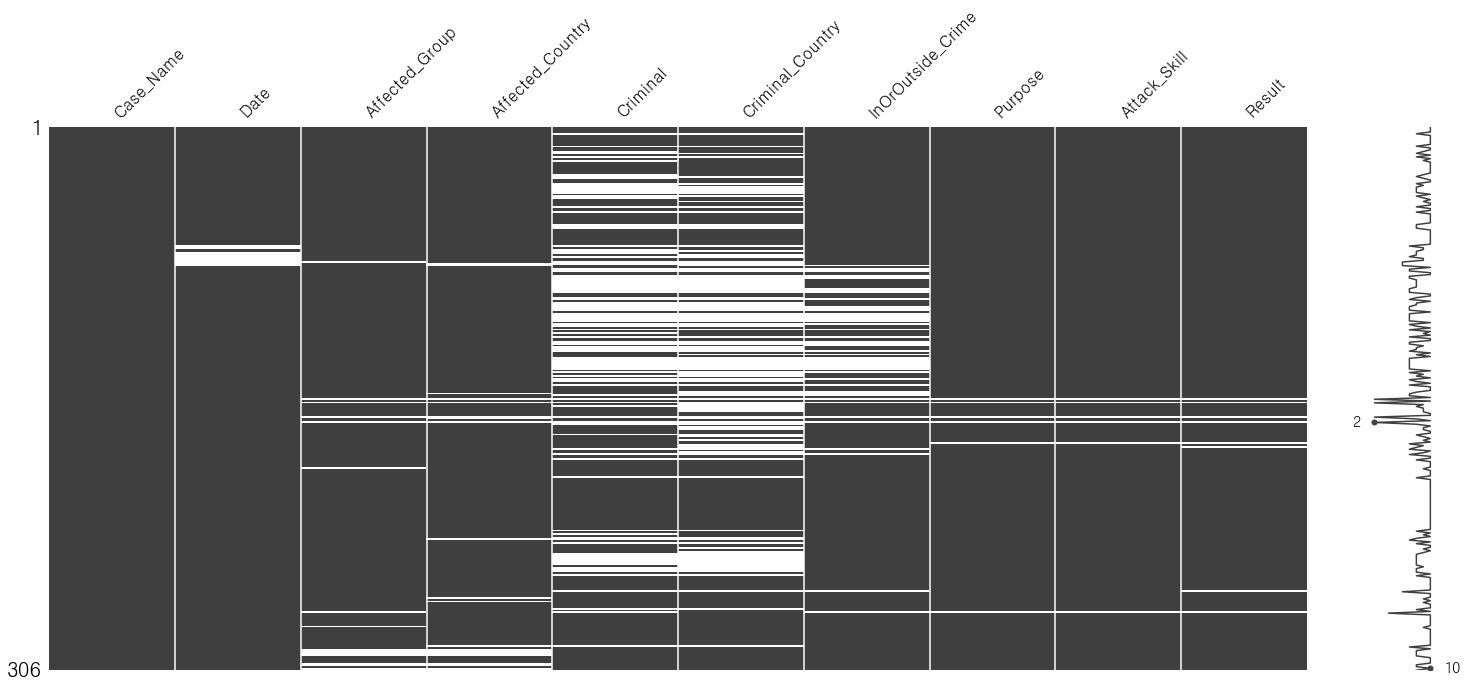

In [14]:
# 결측치 확인
msno.matrix(df_new)

In [15]:
# Purpose
df_new['Purpose'].isnull().value_counts()

False    300
True       6
Name: Purpose, dtype: int64

In [16]:
# Result
df_new['Result'].isnull().value_counts()

False    298
True       8
Name: Result, dtype: int64

In [17]:
df_new[df_new['Result'].isnull() == True]

,Case_Name,Date,Affected_Group,Affected_Country,Criminal,Criminal_Country,InOrOutside_Crime,Purpose,Attack_Skill,Result
153,오스트레일리아 사이버공격,2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
155,패이백 작전,2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
163,스트라포르 이메일 유출 사건,2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
166,토바르 작전,2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
178,웨스터민스터 사이버공격,2017,영국,"영국, 한국 등",조직,영국,외부,NaN,NaN,NaN
180,미국 애틀랜타 사이버공격,2018.03,미국 애틀렌타,미국,샘샘(SamSam),NaN,외부,금전적 이득,악성코드,NaN
261,후지 제록스 정보 유출,2016,Commonwealth Bank,오스트레일리아,NaN,NaN,NaN,정보 획득,해킹,NaN
273,청와대 사칭 hwp 한글 악성파일 첨부,2016.01,NaN,한국,NaN,북한,NaN,NaN,NaN,NaN


In [18]:
# 결측치 제거
df_dropna = df_new.dropna(subset=['Result'], how='any', axis=0)
df_dropna.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 298 entries, 0 to 305
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Case_Name          298 non-null    object
 1   Date               288 non-null    object
 2   Affected_Group     288 non-null    object
 3   Affected_Country   283 non-null    object
 4   Criminal           197 non-null    object
 5   Criminal_Country   186 non-null    object
 6   InOrOutside_Crime  258 non-null    object
 7   Purpose            298 non-null    object
 8   Attack_Skill       298 non-null    object
 9   Result             298 non-null    object
dtypes: object(10)
memory usage: 25.6+ KB


In [19]:
# index 새로 생성
df_dropna.reset_index(drop=True, inplace=True)
df_dropna

,Case_Name,Date,Affected_Group,Affected_Country,Criminal,Criminal_Country,InOrOutside_Crime,Purpose,Attack_Skill,Result
0,코인체크 공격,2018.01.26,암호화폐 거래사업자 코인체크,일본,라자루스,북한,외부,금전적 이득,해킹,금전 손실
1,3·20 전산 대란,2013.03.20,"MBC, KBS, YTN, 신한은행, 농협, 제주은행",한국,북한 정찰총국,북한,외부,사회혼란,APT,사회혼란
2,6·25 사이버 테러,2013.06.25,"새누리당, 청와대, 정부당국, 언론사, 군장병, 주한미군",한국,북한 정찰총국,북한,외부,사회혼란,ScanNDoS,사회혼란
3,소니 픽쳐스 해킹,2014.11.24,소니 픽쳐스 엔터테인먼트,미국,북한 정찰총국,북한,외부,정보획득,악성코드,금전 손실
4,1·25 인터넷 대란,2003.01.25,KT,한국,NaN,NaN,외부,사회혼란,ScanNDoS,사회혼란
...,...,...,...,...,...,...,...,...,...,...
293,개인정보 도용 휴대전화 6000여대 개통,2014,개인,한국,조직,한국,외부,금전적 이득,도박,금전 손실
294,바카라 인터넷 도박,2008,NaN,NaN,조직,한국,외부,금전적 이득,도박,사회혼란
295,조직폭력배 개입 불법 인터넷 도박사이트,2011,NaN,NaN,조직,한국,외부,금전적 이득,도박,사회혼란
296,장애인 대상 소액결제,2021,지적장애인 여성,한국,"20대 남성,여성(조직)",한국,외부,금전적 이득,도박,금전 손실


In [20]:
df_dropna['Case_Name'].value_counts()

옥션 개인정보 유출 사건                1
허위사실 SNS글 1년 넘게 공유           1
Damai 회원정보 유출                1
하나투어 개인정보 유출 사건              1
대한항공(군 무인정찰기 생산) 해킹          1
                            ..
국방통합데이터센터(DIDC) 해킹           1
도박게임 사이버머니 환전업체 운영 경찰관 구속    1
EBS 개인정보 유출 사건               1
일대일 비밀대화 명예훼손죄 성립            1
삼성 메신저 사칭 악성메일 이슈            1
Name: Case_Name, Length: 298, dtype: int64

In [21]:
df_dropna['Result'].isnull().value_counts()

False    298
Name: Result, dtype: int64

In [22]:
df_dropna['Purpose'].value_counts()

금전적 이득                151
군, 국가핵심시설에 관한 정보탈취     35
정치적 목적달성               25
분노표출                   16
사회혼란                   15
경쟁에서 우위선점              14
정보획득                   10
국가기능 마비                 8
기타                      6
사고                      4
우월감                     4
영웅심                     3
실력과시                    3
정보 획득                   2
개인정보수집                  1
종교적 목적                  1
Name: Purpose, dtype: int64

In [23]:
df_dropna['Result'].value_counts()

개인정보 유출    96
사회혼란       61
금전 손실      50
정신적 피해     31
국가기밀유출     27
평판훼손       11
산업기술 유출    10
신뢰하락        4
사회 혼란       4
데이터 손실      3
저작권 침해      1
Name: Result, dtype: int64

# 명목형 변수 수치화

In [24]:
## Purpose
df_purpose = df_dropna[['Case_Name', 'Purpose']]
df_purpose

,Case_Name,Purpose
0,코인체크 공격,금전적 이득
1,3·20 전산 대란,사회혼란
2,6·25 사이버 테러,사회혼란
3,소니 픽쳐스 해킹,정보획득
4,1·25 인터넷 대란,사회혼란
...,...,...
293,개인정보 도용 휴대전화 6000여대 개통,금전적 이득
294,바카라 인터넷 도박,금전적 이득
295,조직폭력배 개입 불법 인터넷 도박사이트,금전적 이득
296,장애인 대상 소액결제,금전적 이득


In [25]:
# 명목형 변수의 값 개수
df_purpose['Purpose'].nunique()

16

In [26]:
# One-hot Encoding
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False)

ohe.fit(df_purpose[['Purpose']])
ohe_trans = ohe.transform(df_purpose[['Purpose']])
ohe_trans[-1]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [27]:
pcols = list(map(lambda x: 'pp'+str(x), range(16)))
print(pcols)

['pp0', 'pp1', 'pp2', 'pp3', 'pp4', 'pp5', 'pp6', 'pp7', 'pp8', 'pp9', 'pp10', 'pp11', 'pp12', 'pp13', 'pp14', 'pp15']


In [28]:
# 인코딩 변수 데이터프레임화
df_ohe = pd.DataFrame(ohe_trans)
df_ohe.columns = pcols
df_ohe

,pp0,pp1,pp2,pp3,pp4,pp5,pp6,pp7,pp8,pp9,pp10,pp11,pp12,pp13,pp14,pp15
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
294,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
295,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
296,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
# 인코딩 변수 담기
df_purpose2 = pd.concat([df_purpose, df_ohe], axis=1)
df_purpose2

,Case_Name,Purpose,pp0,pp1,pp2,pp3,pp4,pp5,pp6,pp7,pp8,pp9,pp10,pp11,pp12,pp13,pp14,pp15
0,코인체크 공격,금전적 이득,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3·20 전산 대란,사회혼란,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,6·25 사이버 테러,사회혼란,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,소니 픽쳐스 해킹,정보획득,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1·25 인터넷 대란,사회혼란,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,개인정보 도용 휴대전화 6000여대 개통,금전적 이득,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
294,바카라 인터넷 도박,금전적 이득,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
295,조직폭력배 개입 불법 인터넷 도박사이트,금전적 이득,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
296,장애인 대상 소액결제,금전적 이득,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Purpose 군집분석
1. 범주형변수 인코딩
2. KMeans 군집분석
3. 군집별 비교
==> 결론: 변수 1개만으로 의미 찾기 어려움

In [30]:
from sklearn.cluster import KMeans

# X 변수
x = df_ohe

# 모델 생성
kmeans = KMeans(n_clusters=4, init='random')

# 모델 학습 및 예측
y_pred = kmeans.fit_predict(x)
y_pred

array([1, 0, 0, 0, 0, 0, 1, 1, 1, 3, 1, 0, 1, 0, 1, 1, 3, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 2, 1, 2, 1, 2, 2, 0, 3, 3, 0, 2, 2, 2, 2, 2, 2,
       3, 0, 1, 2, 2, 0, 0, 0, 0, 0, 3, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 0, 3, 1, 1,
       2, 0, 1, 0, 1, 2, 2, 1, 1, 1, 0, 1, 3, 0, 3, 1, 2, 1, 0, 1, 3, 0,
       3, 0, 1, 3, 2, 1, 3, 0, 1, 1, 1, 0, 1, 1, 1, 1, 3, 3, 3, 3, 1, 1,
       1, 3, 1, 1, 1, 1, 0, 1, 1, 1, 3, 0, 1, 0, 0, 1, 0, 0, 0, 3, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 3, 2, 2, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 3, 1, 1, 1, 1,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1])

In [31]:
# 데이터프레임에 군집결과 컬럼추가
df_purpose['cluster'] = y_pred
df_purpose

,Case_Name,Purpose,cluster
0,코인체크 공격,금전적 이득,1
1,3·20 전산 대란,사회혼란,0
2,6·25 사이버 테러,사회혼란,0
3,소니 픽쳐스 해킹,정보획득,0
4,1·25 인터넷 대란,사회혼란,0
...,...,...,...
293,개인정보 도용 휴대전화 6000여대 개통,금전적 이득,1
294,바카라 인터넷 도박,금전적 이득,1
295,조직폭력배 개입 불법 인터넷 도박사이트,금전적 이득,1
296,장애인 대상 소액결제,금전적 이득,1


In [32]:
# 군집별 데이터 개수 확인
df_purpose['cluster'].value_counts()

1    151
0     87
2     35
3     25
Name: cluster, dtype: int64

In [33]:

cluster0 = df_purpose[df_purpose['cluster']==0]['Purpose'].value_counts()
cluster1 = df_purpose[df_purpose['cluster']==1]['Purpose'].value_counts()
cluster2 = df_purpose[df_purpose['cluster']==2]['Purpose'].value_counts()
cluster3 = df_purpose[df_purpose['cluster']==3]['Purpose'].value_counts()
cluster4 = df_purpose[df_purpose['cluster']==4]['Purpose'].value_counts()

print("==== cluster0 ====\n", cluster0, '\n')
print("==== cluster1 ====\n", cluster1, '\n')
print("==== cluster2 ====\n", cluster2, '\n')
print("==== cluster3 ====\n", cluster3, '\n')
print("==== cluster4 ====\n", cluster4)

==== cluster0 ====
 분노표출         16
사회혼란         15
경쟁에서 우위선점    14
정보획득         10
국가기능 마비       8
기타            6
사고            4
우월감           4
영웅심           3
실력과시          3
정보 획득         2
개인정보수집        1
종교적 목적        1
Name: Purpose, dtype: int64 

==== cluster1 ====
 금전적 이득    151
Name: Purpose, dtype: int64 

==== cluster2 ====
 군, 국가핵심시설에 관한 정보탈취    35
Name: Purpose, dtype: int64 

==== cluster3 ====
 정치적 목적달성    25
Name: Purpose, dtype: int64 

==== cluster4 ====
 Series([], Name: Purpose, dtype: int64)


# Purpose, Attack_Skill, Result 수치화&군집분석

In [34]:
df2 = df_dropna[['Purpose', 'Attack_Skill', 'Result']]
df2

,Purpose,Attack_Skill,Result
0,금전적 이득,해킹,금전 손실
1,사회혼란,APT,사회혼란
2,사회혼란,ScanNDoS,사회혼란
3,정보획득,악성코드,금전 손실
4,사회혼란,ScanNDoS,사회혼란
...,...,...,...
293,금전적 이득,도박,금전 손실
294,금전적 이득,도박,사회혼란
295,금전적 이득,도박,사회혼란
296,금전적 이득,도박,금전 손실


In [35]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298 entries, 0 to 297
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Purpose       298 non-null    object
 1   Attack_Skill  298 non-null    object
 2   Result        298 non-null    object
dtypes: object(3)
memory usage: 7.1+ KB


### 방법1. 더미변수화 & K Means
참고자료
1. ADP 실기책 p.399
2. https://shiningyouandme.tistory.com/39

In [36]:
## 방법1. 더미변수화
# 더미변수화
df2_dummy = pd.get_dummies(df2)
df2_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298 entries, 0 to 297
Data columns (total 42 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   Purpose_개인정보수집              298 non-null    uint8
 1   Purpose_경쟁에서 우위선점           298 non-null    uint8
 2   Purpose_국가기능 마비             298 non-null    uint8
 3   Purpose_군, 국가핵심시설에 관한 정보탈취  298 non-null    uint8
 4   Purpose_금전적 이득              298 non-null    uint8
 5   Purpose_기타                  298 non-null    uint8
 6   Purpose_분노표출                298 non-null    uint8
 7   Purpose_사고                  298 non-null    uint8
 8   Purpose_사회혼란                298 non-null    uint8
 9   Purpose_실력과시                298 non-null    uint8
 10  Purpose_영웅심                 298 non-null    uint8
 11  Purpose_우월감                 298 non-null    uint8
 12  Purpose_정보 획득               298 non-null    uint8
 13  Purpose_정보획득                298 non-null    uint8
 14  Purpose_정치

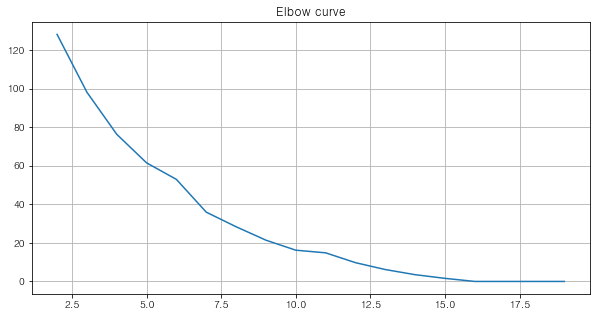

In [37]:
## 군집개수 정하기
# distortions 급격한 변화일 때의 클러스터 개수 선정 =5
# PCA 필요해보임..
distortions = []
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(x)
    distortions.append(kmeans.inertia_)

fig = plt.figure(figsize=(10, 5))
plt.plot(range(2, 20), distortions)
plt.grid(True)
plt.title('Elbow curve')
plt.show()

In [38]:
## 군집분석

# X 변수
x = df2_dummy.values

# 모델 생성
kmeans = KMeans(n_clusters=5, init='random')

# 모델 학습 및 예측
model = kmeans.fit(x)
y_pred = model.predict(x)
y_pred

array([4, 0, 0, 4, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 3, 2, 4, 2, 2, 2, 4, 4, 4, 2, 4, 2, 0, 2, 2, 0, 0,
       0, 4, 2, 2, 0, 4, 3, 2, 3, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3,
       0, 0, 2, 3, 3, 0, 0, 0, 1, 0, 3, 2, 2, 4, 4, 4, 2, 4, 4, 0, 4, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 4, 4, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 2,
       3, 0, 0, 0, 2, 3, 3, 0, 2, 0, 0, 4, 0, 0, 0, 0, 3, 3, 2, 4, 0, 0,
       0, 0, 2, 0, 3, 4, 0, 2, 2, 2, 2, 3, 2, 2, 4, 4, 2, 0, 2, 0, 2, 2,
       2, 0, 4, 4, 4, 4, 4, 1, 1, 2, 0, 2, 2, 1, 1, 4, 1, 4, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 2, 0, 2, 2, 2, 0, 3, 3, 3, 3, 4, 4, 4, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 4, 2, 4, 4, 4, 1, 1, 1, 4, 2, 1, 1, 1, 1, 1, 2, 4, 4, 1,
       0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 1, 1, 4, 4, 4, 1,
       4, 0, 0, 0, 4, 4, 4, 4, 0, 0, 4, 0])

In [39]:
# 데이터프레임에 군집결과 컬럼추가
df2['cluster'] = y_pred
df2

,Purpose,Attack_Skill,Result,cluster
0,금전적 이득,해킹,금전 손실,4
1,사회혼란,APT,사회혼란,0
2,사회혼란,ScanNDoS,사회혼란,0
3,정보획득,악성코드,금전 손실,4
4,사회혼란,ScanNDoS,사회혼란,0
...,...,...,...,...
293,금전적 이득,도박,금전 손실,4
294,금전적 이득,도박,사회혼란,0
295,금전적 이득,도박,사회혼란,0
296,금전적 이득,도박,금전 손실,4


In [40]:
model.cluster_centers_

array([[ 1.40845070e-02,  7.04225352e-02,  1.12676056e-01,
         5.63380282e-02,  2.39436620e-01,  1.40845070e-02,
         1.40845070e-02,  1.40845070e-02,  1.97183099e-01,
         1.40845070e-02, -1.73472348e-18,  1.04083409e-17,
         5.20417043e-18,  1.40845070e-02,  2.39436620e-01,
         2.60208521e-18,  4.22535211e-02,  1.97183099e-01,
        -6.93889390e-18,  2.60208521e-18, -6.93889390e-18,
         8.45070423e-02, -4.16333634e-17,  1.40845070e-02,
         5.20417043e-18, -1.04083409e-17,  4.22535211e-02,
         5.21126761e-01, -5.55111512e-17, -3.46944695e-18,
         9.85915493e-02,  1.40845070e-02, -2.77555756e-17,
         5.55111512e-17,  4.22535211e-02,  1.04083409e-17,
         8.59154930e-01,  5.63380282e-02,  1.40845070e-02,
         1.40845070e-02, -2.77555756e-17, -5.55111512e-17],
       [ 1.73472348e-18,  6.66666667e-02,  1.38777878e-17,
        -1.38777878e-17,  2.66666667e-01,  1.11111111e-01,
         2.88888889e-01,  6.93889390e-18, -3.46944695e-

In [41]:

cluster0 = df2[df2['cluster']==0]['Purpose'].value_counts()
cluster1 = df2[df2['cluster']==1]['Purpose'].value_counts()
cluster2 = df2[df2['cluster']==2]['Purpose'].value_counts()
cluster3 = df2[df2['cluster']==3]['Purpose'].value_counts()

print("==== cluster0 ====\n", cluster0, '\n')
print("==== cluster1 ====\n", cluster1, '\n')
print("==== cluster2 ====\n", cluster2, '\n')
print("==== cluster3 ====\n", cluster3, '\n')

==== cluster0 ====
 정치적 목적달성              17
금전적 이득                17
사회혼란                  14
국가기능 마비                8
경쟁에서 우위선점              5
군, 국가핵심시설에 관한 정보탈취     4
실력과시                   1
사고                     1
정보획득                   1
개인정보수집                 1
기타                     1
분노표출                   1
Name: Purpose, dtype: int64 

==== cluster1 ====
 분노표출         13
금전적 이득       12
기타            5
정치적 목적달성      4
우월감           4
경쟁에서 우위선점     3
정보획득          2
종교적 목적        1
영웅심           1
Name: Purpose, dtype: int64 

==== cluster2 ====
 금전적 이득       77
정보획득          6
사고            3
정보 획득         2
영웅심           2
정치적 목적달성      2
실력과시          2
분노표출          1
경쟁에서 우위선점     1
Name: Purpose, dtype: int64 

==== cluster3 ====
 군, 국가핵심시설에 관한 정보탈취    31
정치적 목적달성               2
사회혼란                   1
금전적 이득                 1
Name: Purpose, dtype: int64 



In [42]:
df2['cluster'].value_counts()

2    96
0    71
4    51
1    45
3    35
Name: cluster, dtype: int64

In [43]:
## Cluster 데이터 확인
df2[df2['cluster']==0].drop_duplicates()

,Purpose,Attack_Skill,Result,cluster
1,사회혼란,APT,사회혼란,0
2,사회혼란,ScanNDoS,사회혼란,0
9,정치적 목적달성,ScanNDoS,사회혼란,0
39,금전적 이득,악성코드,사회혼란,0
44,국가기능 마비,악성코드,사회혼란,0
48,금전적 이득,ScanNDoS,사회혼란,0
53,금전적 이득,APT,사회혼란,0
57,정치적 목적달성,악성코드,사회혼란,0
60,"군, 국가핵심시설에 관한 정보탈취",해킹,사회혼란,0
61,"군, 국가핵심시설에 관한 정보탈취",악성코드,사회혼란,0


In [44]:
df2['Purpose'].value_counts()

금전적 이득                151
군, 국가핵심시설에 관한 정보탈취     35
정치적 목적달성               25
분노표출                   16
사회혼란                   15
경쟁에서 우위선점              14
정보획득                   10
국가기능 마비                 8
기타                      6
사고                      4
우월감                     4
영웅심                     3
실력과시                    3
정보 획득                   2
개인정보수집                  1
종교적 목적                  1
Name: Purpose, dtype: int64

### 군집된 데이터 내보내기

In [45]:
# 내보낼 데이터프레임
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298 entries, 0 to 297
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Purpose       298 non-null    object
 1   Attack_Skill  298 non-null    object
 2   Result        298 non-null    object
 3   cluster       298 non-null    int32 
dtypes: int32(1), object(3)
memory usage: 8.3+ KB


In [46]:
# Date 포함
df2['Date'] = df_dropna['Date']
df2.head()

,Purpose,Attack_Skill,Result,cluster,Date
0,금전적 이득,해킹,금전 손실,4,2018.01.26
1,사회혼란,APT,사회혼란,0,2013.03.20
2,사회혼란,ScanNDoS,사회혼란,0,2013.06.25
3,정보획득,악성코드,금전 손실,4,2014.11.24
4,사회혼란,ScanNDoS,사회혼란,0,2003.01.25


In [47]:
# csv로 내보내기
dir_path
file_name = "cluster_data_0930.csv"
data_path = os.path.join(dir_path, file_name)
# df2.to_csv(data_path, sep=',', na_rep='NaN')

#### 시각화
*범주형 변수 군집화 시각화 방법은 좀더 고민해보기*

1. PCA를 통해 2개 변수

In [48]:
## 시각화


#### 클러스터 평가
1. 실루엣 분석: https://ariz1623.tistory.com/224
2. RandIndex

In [49]:
## 타당성 평가
# 군집 간 거리, 군집 간 분산, 실루엣 지표 등 사용가능

# 실루엣 분석
from sklearn.metrics import silhouette_samples, silhouette_score

# 실루엣 계수
silhouette_score(df2_dummy, df2['cluster'])


0.30933051185390176

In [50]:
#  Rand Index: 외부평가
from sklearn.metrics.cluster import adjusted_rand_score

# adjusted_rand_score(df2_dummy, df2['cluster'])

### K-Means 단순수치화 변환

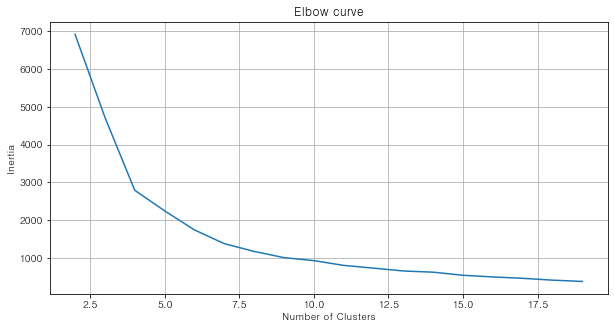

In [61]:
# 단순수치화 변수, 군집개수 산정
## 군집개수 정하기
x = df3

distortions = []
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(x)
    distortions.append(kmeans.inertia_)

fig = plt.figure(figsize=(10, 5))
plt.plot(range(2, 20), distortions)
plt.grid(True)
plt.title('Elbow curve')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

In [62]:
## 단순 수치화 변환 방법
# x 변수
x = df3.values

# 모델 생성
kmeans = KMeans(n_clusters=4, init='random')

# 모델 학습 및 예측
model = kmeans.fit(x)
y_pred = model.predict(x)

# 실루엣 계수
silhouette_score(df3, y_pred)

0.5258898137370874

In [63]:
# 최고 실루엣 계수 데이터프레임화
df_best = df_dropna[['Purpose', 'Attack_Skill', 'Result']]
df_best['cluster'] = y_pred
df_best

,Purpose,Attack_Skill,Result,cluster
0,금전적 이득,해킹,금전 손실,3
1,사회혼란,APT,사회혼란,3
2,사회혼란,ScanNDoS,사회혼란,3
3,정보획득,악성코드,금전 손실,3
4,사회혼란,ScanNDoS,사회혼란,3
...,...,...,...,...
293,금전적 이득,도박,금전 손실,0
294,금전적 이득,도박,사회혼란,0
295,금전적 이득,도박,사회혼란,0
296,금전적 이득,도박,금전 손실,0


In [64]:
# 클러스터 확인
df_best['cluster'].value_counts()

3    153
2     86
0     32
1     27
Name: cluster, dtype: int64

In [79]:
pd.DataFrame(df_best[df_best['cluster']==0].value_counts())

0
Purpose  Attack_Skill Result cluster   
금전적 이득   음란물 유포       정신적 피해 0        9
         도박           사회혼란   0        6
                      금전 손실  0        5
정치적 목적달성 명예훼손         평판훼손   0        4
금전적 이득   저작권 침해       금전 손실  0        3
                      정신적 피해 0        2
정치적 목적달성 시스템 침해       사회혼란   0        1
정보획득     개인정보 침해      정신적 피해 0        1
금전적 이득   시스템 침해       사회혼란   0        1

In [66]:
## 시각화
# PCA
from sklearn.decomposition import PCA

# 대상 변수
x = df3.values

pca = PCA(n_components=2)
components = pca.fit_transform(x)
pca_df = pd.DataFrame(data=components, columns = ['principal component1', 'principal component2'])

# pca_df

print("누적 설명 분산량:", sum(pca.explained_variance_ratio_))

누적 설명 분산량: 0.9139676770574048


In [67]:
# cluster 합쳐 데이터프레임화
finalDf = pca_df[['principal component1', 'principal component2']]
finalDf['cluster'] = df_best['cluster']
finalDf.head()

,principal component1,principal component2,cluster
0,-5.278558,-0.552831,3
1,-3.600414,-0.488810,3
2,-2.975755,0.258459,3
3,-2.019778,0.360478,3
4,-2.975755,0.258459,3


In [68]:
indicesToKeep = finalDf['cluster'] == '0'
indicesToKeep

0      False
1      False
2      False
3      False
4      False
       ...  
293    False
294    False
295    False
296    False
297    False
Name: cluster, Length: 298, dtype: bool

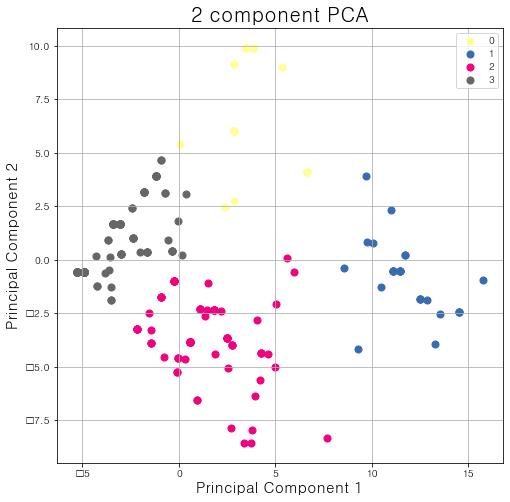

In [69]:
# 시각화
fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize=20)

targets = [0, 1, 2, 3]
colors = ["#ffff99","#386cb0","#f0027f","#666666"]
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['cluster'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component1']
               , finalDf.loc[indicesToKeep, 'principal component2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

### 방법2. K Modes
참고자료

1. https://pypi.org/project/kmodes/
2. http://kookmin.dcollection.net/srch/srchDetail/200000222847?ajax=false&start=0&query=%28ins_code%3A211014%29+AND++%2B%28%28all%3A%EA%B5%B0%EC%A7%91%EB%B6%84%EC%84%9D%29%29&sortDir=desc&pageSize=10&searchKeyWord1=%EA%B5%B0%EC%A7%91%EB%B6%84%EC%84%9D&searchWhere1=all&searchTotalCount=0&navigationSize=10&searchText=%5B%EC%A0%84%EC%B2%B4%3A%3Cspan+class%3D%22point1%22%3E%EA%B5%B0%EC%A7%91%EB%B6%84%EC%84%9D%3C%2Fspan%3E%5D&pageNum=1&rows=10&insCode=211014&searthTotalPage=0&sortField=score

In [52]:
# purpose 범주화
df2['Purpose'].unique()

array(['금전적 이득', '사회혼란', '정보획득', '사고', '정치적 목적달성', '실력과시',
       '군, 국가핵심시설에 관한 정보탈취', '정보 획득', '국가기능 마비', '경쟁에서 우위선점', '개인정보수집',
       '분노표출', '영웅심', '우월감', '종교적 목적', '기타'], dtype=object)

In [53]:
pp_category = {'금전적 이득':1, '사회혼란':2, '정보획득':3,'사고':4, '정치적 목적달성':5,'실력과시':6,
       '군, 국가핵심시설에 관한 정보탈취':7, '정보 획득':8, '국가기능 마비':9, '경쟁에서 우위선점':10,'개인정보수집':11,
       '분노표출':12, '영웅심':13, '우월감':14, '종교적 목적':15, '기타':16}
df3 = pd.DataFrame(df2['Purpose'].replace(pp_category).astype('category'))
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298 entries, 0 to 297
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   Purpose  298 non-null    category
dtypes: category(1)
memory usage: 1.2 KB


In [54]:
# Attack_Skill 범주화
df2['Attack_Skill'].unique()

array(['해킹', 'APT', 'ScanNDoS', '악성코드', '부주의', '권한 오남용', '개인정보 침해', '사기',
       '시스템 침해', '음란물 유포', '명예훼손', '스토킹', '계정 도용', '저작권 침해', '도박'],
      dtype=object)

In [55]:
as_category = {'해킹':1, 'APT':2, 'ScanNDoS':3, '악성코드':4, '부주의':5, '권한 오남용':6, '개인정보 침해':7, '사기':8,
       '시스템 침해':9, '음란물 유포':10, '명예훼손':11, '스토킹':12, '계정 도용':13, '저작권 침해':14, '도박':15}
df3['Attack_Skill'] = df2['Attack_Skill'].replace(as_category).astype('category')
df3

,Purpose,Attack_Skill
0,1,1
1,2,2
2,2,3
3,3,4
4,2,3
...,...,...
293,1,15
294,1,15
295,1,15
296,1,15


In [56]:
# Result 범주화
df2['Result'].unique()

array(['금전 손실', '사회혼란', '개인정보 유출', '신뢰하락', '국가기밀유출', '산업기술 유출', '저작권 침해',
       '데이터 손실', '정신적 피해', '평판훼손', '사회 혼란'], dtype=object)

In [57]:
re_category = {'금전 손실':1, '사회혼란':2, '개인정보 유출':2, '신뢰하락':3, '국가기밀유출':4, '산업기술 유출':5, '저작권 침해':6,
       '데이터 손실':7, '정신적 피해':8, '평판훼손':9, '사회 혼란':10}
df3['Result'] = df2['Result'].replace(re_category).astype('category')
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298 entries, 0 to 297
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Purpose       298 non-null    category
 1   Attack_Skill  298 non-null    category
 2   Result        298 non-null    category
dtypes: category(3)
memory usage: 2.9 KB


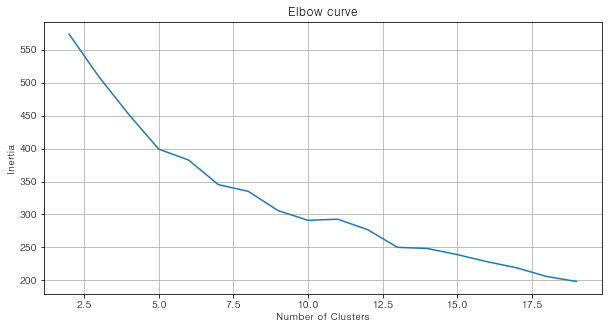

In [58]:
## 군집개수 정하기
# distortions 급격한 변화일 때의 클러스터 개수 선정 =4
distortions = []
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(x)
    distortions.append(kmeans.inertia_)

fig = plt.figure(figsize=(10, 5))
plt.plot(range(2, 20), distortions)
plt.grid(True)
plt.title('Elbow curve')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

In [59]:
# K Mode 군집분석
from kmodes.kmodes import KModes

# x 변수
x = df3.values
km = KModes(n_clusters=4, init='Huang', n_init=5, verbose=1)

clusters = km.fit_predict(x)

# Print the cluster centroids
print(km.cluster_centroids_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 76, cost: 356.0
Run 1, iteration: 2/100, moves: 17, cost: 356.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 69, cost: 325.0
Run 2, iteration: 2/100, moves: 15, cost: 325.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 80, cost: 314.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 11, cost: 320.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 30, cost: 367.0
Best run was number 3
[[ 1  1  2]
 [ 1  4  2]
 [ 1 10  8]
 [ 7  2  4]]


In [60]:
clusters

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 3, 0, 3, 0, 1, 3, 1, 1, 0, 1, 0, 1, 1, 3, 1, 3,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       3, 0, 1, 1, 0, 3, 3, 0, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 0, 0, 1, 0,
       0, 1, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 2, 2, 0, 0, 0, 0, 2, 2, 0, 2, 0, 2, 0, 2, 0,
       0, 2, 0, 0, 0, 2, 0, 0, 2, 2, 2, 0, 2, 0, 0, 2, 2, 2, 0, 2, 2, 2,
       2, 0, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 0, 0, 1, 2,
       1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 2, 2, 0, 0, 1, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=u

In [ ]:
df4 = df_dropna[['Purpose', 'Attack_Skill', 'Result']]
df4['cluster'] = clusters
df4

In [ ]:
df4['cluster'].value_counts()

In [ ]:
df4[df4['cluster']==0].drop_duplicates()

In [ ]:
# 데이터 값
cluster1 = df4[df4['cluster']==1].drop_duplicates()
cluster1

In [ ]:
# 데이터 값
cluster0 = df4[df4['cluster']==0].drop_duplicates()
cluster0

In [ ]:
## 클러스터 평가: 실루엣 계수
# 실루엣 분석
from sklearn.metrics import silhouette_samples, silhouette_score

# 실루엣 계수
silhouette_score(df3, df4['cluster'])

In [ ]:
score = silhouette_score(df3, df4['cluster'])
score

### 방법3. H Clust
계층적 군집분석
1. 데이터 간 거리 계산
2. 덴드로그램 시각화
3. 덴드로그램으로 적절한 클러스터 개수 찾기
4. Cluster로 Agglomerative Clustering까지 활용


참고자료
1. https://todayisbetterthanyesterday.tistory.com/61
2. https://tobigs.gitbook.io/tobigs/data-analysis/undefined-3/python-2-2#pca
3. https://tobigs.gitbook.io/tobigs/data-analysis/undefined-3/python-2-1#1-hierarchical-clustering

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage, ward

## X 변수 준비
# 더미변수화한 X
x_1 = df2_dummy.values

# 숫자 형태로 변환한 X
x_2 = df3.values


## 거리 계산
# linked = linkage(x_1, 'ward')
linkage_array = ward(x_1)


## 덴드로그램
dendrogram(linkage_array)
plt.xlabel("Case Num")
plt.ylabel("Cluster Dist")

# 클러스터 구분하는 커트라인 표시
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [11, 11], '--', c='k')
ax.plot(bounds, [9, 9], '--', c='k')
ax.text(bounds[1], 11, ' 3 Clusters ', va='center', fontdict={'size': 10})
ax.text(bounds[1], 9, ' 5 Clusters ', va='center', fontdict={'size': 10})
# plt.figure(figsize=(20,30))
plt.title("Dendrogram")
plt.show()

In [ ]:
## 거리 계산
# linked = linkage(x_1, 'ward')
linkage_array = ward(x_2)


## 덴드로그램
dendrogram(linkage_array)
plt.xlabel("Case Num")
plt.ylabel("Cluster Dist")

# 클러스터 구분하는 커트라인 표시
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [50, 50], '--', c='k')
ax.plot(bounds, [30, 30], '--', c='k')
ax.text(bounds[1], 50, ' 4 Clusters ', va='center', fontdict={'size': 10})
ax.text(bounds[1], 30, ' 6 Clusters ', va='center', fontdict={'size': 10})
# plt.figure(figsize=(20,30))
plt.figure(figsize=(40,50))
plt.show()

In [ ]:
# 5 Cluster로 군집화
from sklearn.cluster import AgglomerativeClustering
agg_cluster = AgglomerativeClustering(n_clusters=5, linkage='ward')
cluster = agg_cluster.fit_predict(x_1)
cluster

In [ ]:
df_agg = df_dropna[['Purpose', 'Attack_Skill', 'Result']]
df_agg['cluster'] = cluster
df_agg.cluster.value_counts()

In [ ]:
# 실루엣 계수
silhouette_score(x_1, df_agg['cluster'])

In [ ]:
df_agg[df_agg['cluster']==2].drop_duplicates()

In [ ]:
## x_2 로 군집분석
agg_cluster2 = AgglomerativeClustering(n_clusters=4, linkage='ward')
cluster = agg_cluster2.fit_predict(x_2)
cluster
silhouette_score(x_2, cluster)

In [ ]:
df_agg2 = df_dropna[['Purpose', 'Attack_Skill', 'Result']]
df_agg2['cluster']=cluster
df_agg2.cluster.value_counts()

In [ ]:
df_agg2[df_agg2['cluster']==2].drop_duplicates()

# 코사인 유사도
"결과종합" 변수로 케이스별 결과문장 유사도 측정
=> 나중에 다시도전

In [ ]:
# from konlpy.tag import okt
from numpy import dot
from numpy.linalg import norm
from pprint import pprint

In [ ]:
# 결과종합 데이터
result_cos = df[['결과종합']]
result_cos.head()

In [ ]:
# 결측치 제거
result_cos.dropna( axis=0, inplace=True)
result_cos.isnull().value_counts()

In [ ]:
## 자연어 처리
# 문자열 공백 제거
result_cos = result_cos['결과종합'].str.replace(' ', '')
print(result_cos)

In [ ]:
# 값 확인
print(result_cos[0],',', len(result_cos[0]))
print(type(result_cos[0]))

In [ ]:

set(result_cos)